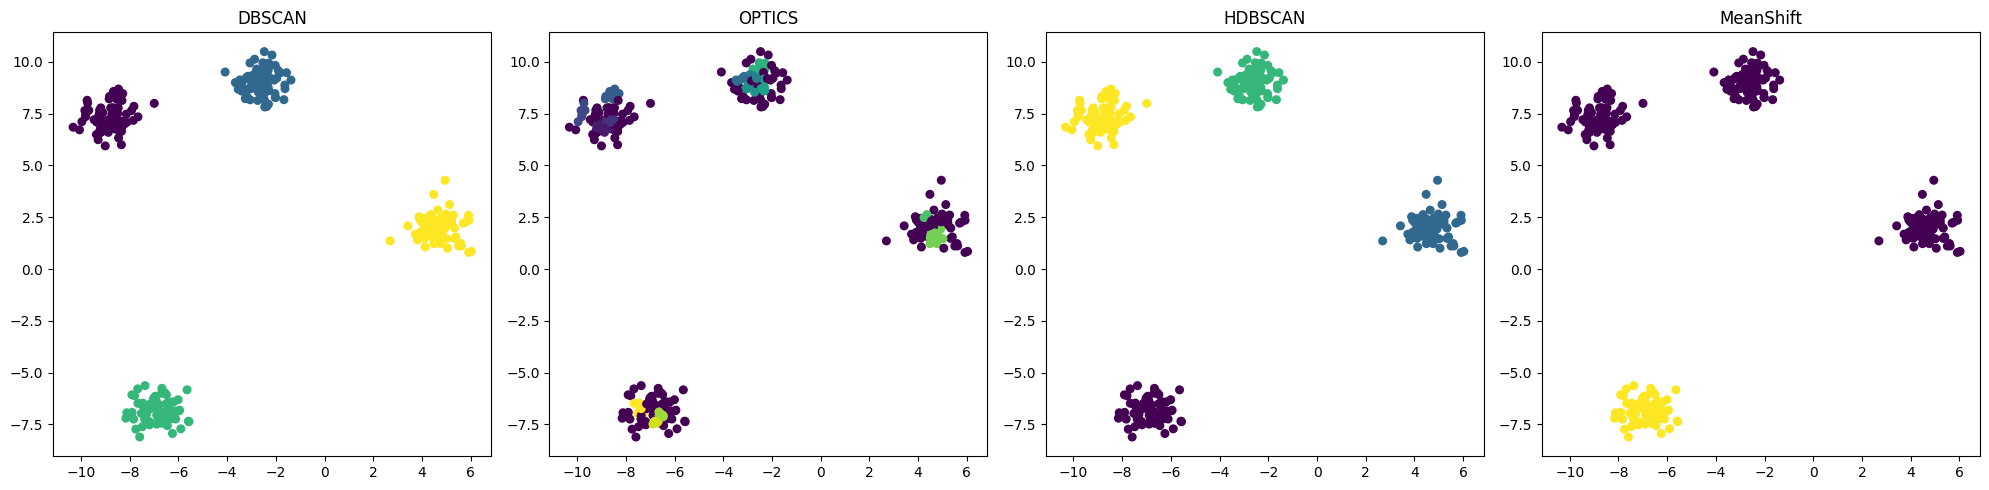

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, OPTICS, MeanShift
from hdbscan import HDBSCAN

# Generate synthetic data
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Density-based clustering models
models = {
    "DBSCAN": DBSCAN(eps=2, min_samples=5), # eps是邻域半径，min_samples是邻域内最小样本数，该算法对eps和min_samples参数敏感
    "OPTICS": OPTICS(eps=2, min_samples=5), # OPTICS算法是DBSCAN算法的扩展，可以处理不同密度的数据集
    "HDBSCAN": HDBSCAN(min_cluster_size=10, min_samples=5),
    "MeanShift": MeanShift()
}

# Plot results
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.fit_predict(X)
    axes[i].scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30)
    axes[i].set_title(name)

plt.tight_layout()
plt.show()


### 密度聚类（Density-Based Clustering）模型

密度聚类是一种基于点的密度进行聚类的方法，可以有效处理复杂形状的簇结构，并且能够识别噪声点。以下是主要的密度聚类模型：

---

### **1. DBSCAN**
   - **全称**：Density-Based Spatial Clustering of Applications with Noise
   - **特点**：
     - 基于点的密度来形成簇，要求每个簇的点在一定密度范围内。
     - 通过两个参数控制簇的形成：`eps`（点之间的最大距离）和 `min_samples`（簇的最小点数）。
   - **适用场景**：
     - 适合任意形状的簇。
     - 数据中可能包含噪声或离群点。
   - **优点**：
     - 能识别任意形状的簇。
     - 能有效处理噪声点。
   - **缺点**：
     - 对参数（`eps` 和 `min_samples`）敏感。
     - 对高维数据效果较差（距离度量受限）。

---

### **2. OPTICS**
   - **全称**：Ordering Points To Identify the Clustering Structure
   - **特点**：
     - 是 DBSCAN 的扩展，能够适应不同密度的簇。
     - 输出的是数据点的顺序和可达性距离，可以通过可视化生成不同的簇。
   - **适用场景**：
     - 数据中簇密度不均的情况。
     - 需要详细分析密度分布的场景。
   - **优点**：
     - 能处理不同密度的簇。
     - 能生成更多关于簇结构的信息。
   - **缺点**：
     - 计算复杂度较高。
     - 参数调试较为复杂。

---

### **3. HDBSCAN**
   - **全称**：Hierarchical Density-Based Spatial Clustering of Applications with Noise
   - **特点**：
     - 结合了层次聚类和密度聚类的特点。
     - 自动选择合适的簇数。
     - 对噪声点和离群值更鲁棒。
   - **适用场景**：
     - 数据中簇密度不均且包含噪声的情况。
     - 需要自动确定簇数。
   - **优点**：
     - 能处理复杂形状和密度变化的簇。
     - 自动选择最优簇数。
   - **缺点**：
     - 算法复杂，计算较慢。
     - 参数设置（如 `min_cluster_size`）需要调整。

---

### **4. Mean Shift**
   - **特点**：
     - 基于核密度估计来聚类，寻找密度最大点作为簇的中心。
     - 自动确定簇数。
   - **适用场景**：
     - 数据具有自然聚类趋势，密度较高的区域明显。
   - **优点**：
     - 不需要指定簇数。
     - 能处理复杂形状的簇。
   - **缺点**：
     - 计算复杂度较高，不适合大规模数据。
     - 对带宽参数敏感。

---

### **5. DENCLUE**
   - **全称**：Density-Based Clustering
   - **特点**：
     - 使用核密度函数来表示数据点的密度分布。
     - 基于密度吸引力进行聚类。
   - **适用场景**：
     - 需要更精细的密度控制。
   - **优点**：
     - 理论基础强，能生成精确的密度模型。
   - **缺点**：
     - 算法较复杂，适合学术研究场景。

---


### **总结对比表**

| **方法**      | **特点**                              | **适用场景**                       | **优点**                          | **缺点**                           |
|---------------|---------------------------------------|------------------------------------|-----------------------------------|------------------------------------|
| **DBSCAN**    | 基于固定密度，任意形状簇             | 均匀密度的簇，含噪声的场景         | 简单直观，能识别噪声              | 参数敏感，高维数据效果差           |
| **OPTICS**    | 动态密度，适应不同簇密度             | 不同密度的簇，复杂场景             | 灵活，能生成丰富的簇结构信息      | 参数复杂，计算复杂度较高           |
| **HDBSCAN**   | 层次+密度，自动选择簇数              | 密度变化大，噪声点较多的场景       | 自动簇数选择，鲁棒性强            | 算法复杂，参数敏感                 |
| **Mean Shift**| 基于密度核估计，自动簇数             | 数据有明显密度峰值的场景           | 自动簇数，无需参数化              | 计算复杂，带宽参数需调整           |
| **DENCLUE**   | 基于核密度吸引力，理论模型严谨       | 高度定制化需求，理论分析场景       | 精细的密度控制，模型透明          | 算法复杂，实际使用较少             |

